In [1]:
import os
os.chdir('../')
import warnings
warnings.filterwarnings(action='ignore',
    category=DeprecationWarning)

import matplotlib.pyplot as plt
plt.style.use('bmh')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
%matplotlib inline

## I begin with

In [2]:
spectrums = pd.read_csv('mocha/VIS/URINVIS.txt', sep = ' ').T
spectrums = spectrums.iloc[:, 100:700]
spectrums.columns = spectrums.loc['Wavelength(nm)', 100:700]
spectrums = spectrums.loc['Spectrum1':'Spectrum50']
spectrums = spectrums.astype(int)
spectrums.index = [int(s[8:]) for s in spectrums.index]
spectrums.index.name = 'spectrum'

spectrums['label'] = np.tile(np.arange(5), 10)
grouped_mean = spectrums.groupby('label').mean()
grouped_std = spectrums.groupby('label').std()

In [4]:
grouped_mean

Wavelength(nm)  500.03  500.59  501.15  501.71  502.27  502.83  503.39  \
label                                                                    
0               1131.5  1149.9  1166.1  1186.6  1194.4  1206.1  1218.9   
1               1399.0  1437.9  1482.4  1527.1  1559.6  1596.0  1637.0   
2                600.4   625.3   641.7   660.9   672.6   685.9   699.7   
3                597.6   609.4   618.0   639.1   640.0   652.2   665.6   
4                919.8   938.7   965.0   987.2   999.1  1016.0  1034.6   

Wavelength(nm)  503.95  504.51  505.07   ...    825.35  825.90  826.45  \
label                                    ...                             
0               1242.2  1254.9  1264.8   ...     828.4   828.0   816.7   
1               1686.6  1721.3  1764.6   ...    2429.7  2402.8  2381.2   
2                723.2   738.8   760.2   ...     972.3   967.6   959.8   
3                682.3   689.0   699.6   ...    1216.0  1208.4  1198.0   
4               1061.4  1071.5  1091.8   ...     883.3   874.8   869.6   

Wavelength(nm)  827.00  827.55  828.10  828.65  829.20  829.75  830.30  
label                                                                   
0                822.3   810.4   791.7   792.0   779.3   796.0   786.6  
1               2369.0  2341.6  2307.1  2296.9  2273.8  2273.9  2250.1  
2                957.7   944.7   927.1   928.2   917.7   920.2   910.1  
3               1201.5  1186.4  1168.7  1163.0  1149.1  1164.8  1148.2  
4                870.7   859.4   840.8   842.1   826.6   842.5   832.2  

[5 rows x 600 columns]

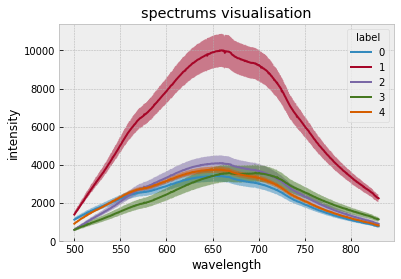

In [3]:
x = np.tile(grouped_mean.columns.values.astype(int), 5).reshape(5, -1)
y1 = (grouped_mean - grouped_std).values
y2 = (grouped_mean + grouped_std).values
grouped_mean.T.plot()
for xj, y1j, y2j in zip(x, y1, y2):
    plt.fill_between(xj, y1j, y2j, alpha=0.5)
plt.title('spectrums visualisation')
plt.xlabel('wavelength')
plt.ylabel('intensity')
plt.savefig('plots/spectrums_visualisation_wv.png', dpi=100)

In [4]:
labels = spectrums['label']
spectrums = spectrums.drop(columns='label')

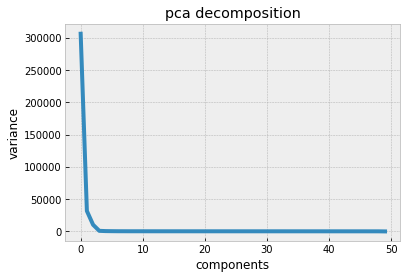

In [5]:
pca_decomposer = PCA(n_components=None)
pca_decomposer.fit(spectrums)
plt.plot(pca_decomposer.singular_values_, lw=4)
plt.xlabel('components')
plt.ylabel('variance')
plt.title('pca decomposition')
plt.savefig('plots/pca_decomposition.png', dpi=100)

In [6]:
pca_decomposer = PCA(n_components=10)
objects = pca_decomposer.fit_transform(spectrums)
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
cross_val_score(model, objects, labels, scoring='accuracy', cv=4)

array([1., 1., 1., 1.])

In [7]:
model = Pipeline([('pca', PCA(n_components=10)), ('linear', LogisticRegression())])
cross_val_score(model, spectrums, labels, scoring='accuracy', cv=4)

array([1., 1., 1., 1.])

In [8]:
model.fit(spectrums, labels)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linear', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])